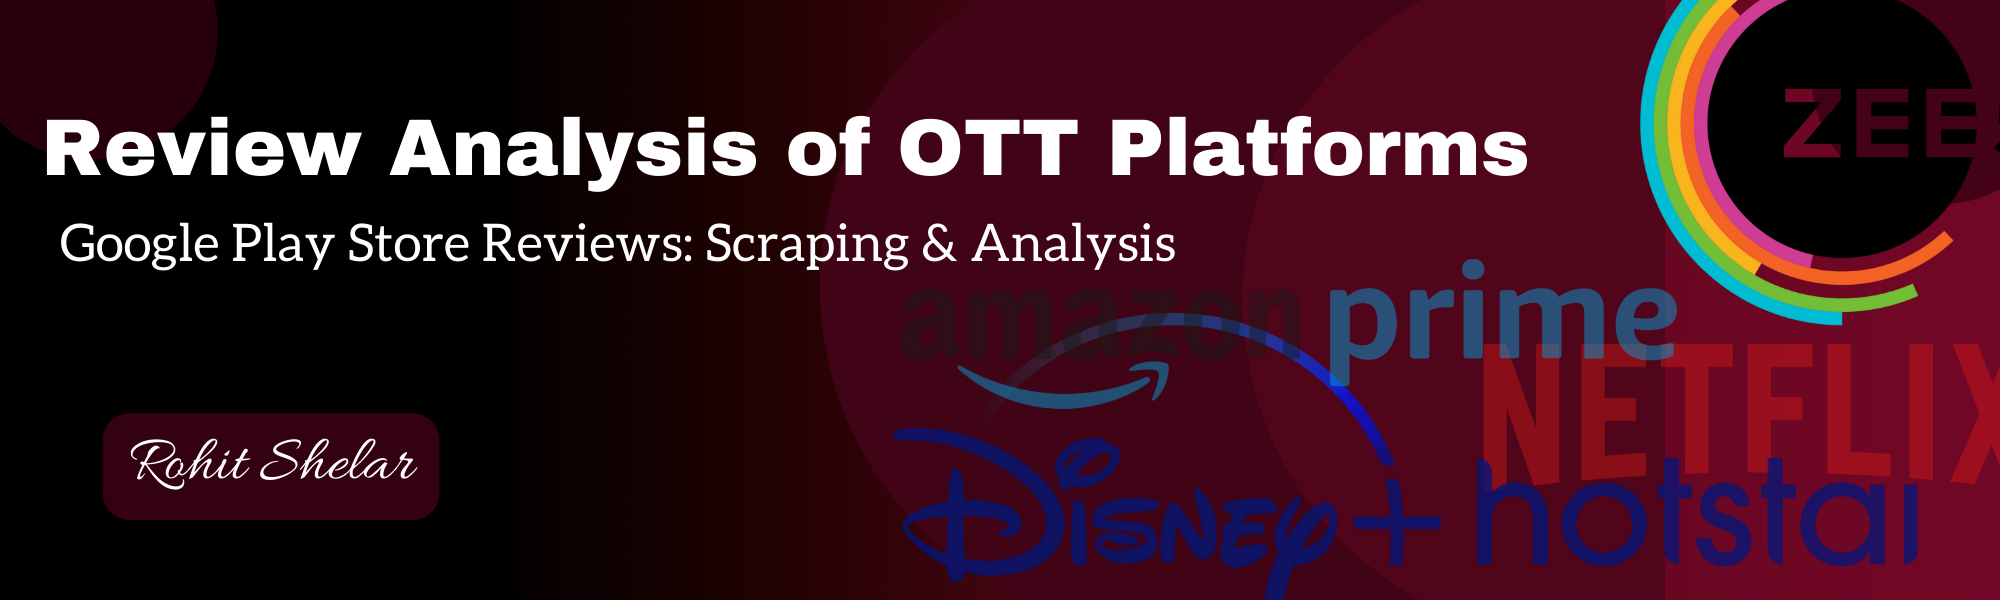

The Play Store review analysis of OTT platforms holds significant importance for product management.


> "It provides valuable insights into user preferences, satisfaction levels,frustrations,pain points,constructive suggestions and areas for improvement."


Understanding the reviews helps product managers identify the pitfalls in their platforms,listen to the users grievances, allowing them to make data-driven decisions to enhance user experience. They can identify patterns and trends in user feedback related to features, content selection, streaming quality, and customer support, among others.

# **Scraping Reviews from Google Play Store**

**Installing Requisite Packages**

In [ ]:
!pip install -q google_play_scraper
!pip install pyyaml==6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 36.0 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all

**How to get the Link to Reviews?**

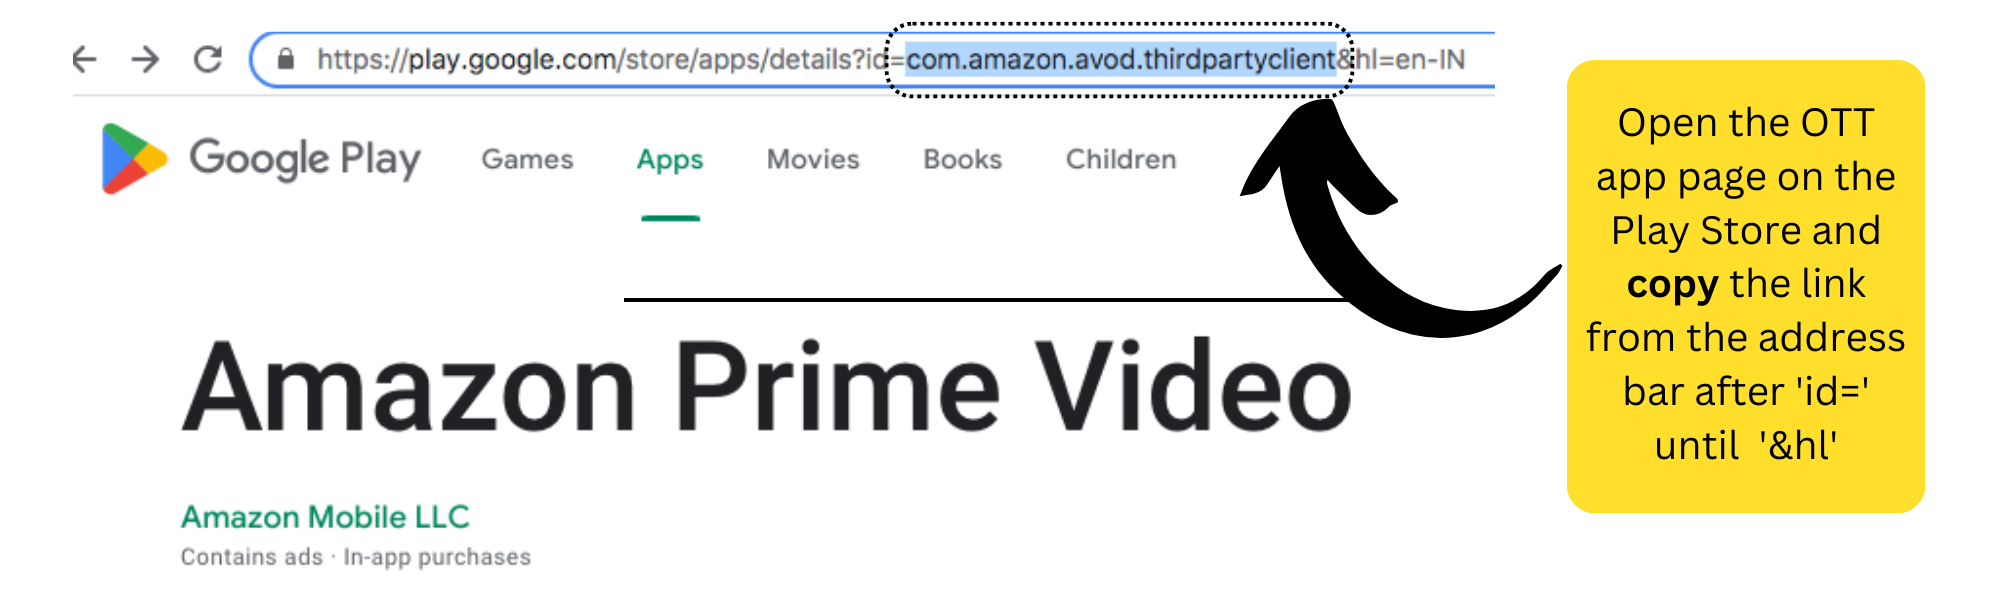

In [ ]:
#primevideo_reviews = reviews_all( 'com.amazon.avod.thirdpartyclient', sleep_milliseconds=1, lang ='en',country='IN', sort=Sort.NEWEST)

Store the reviews in the dataframe by using *json_normalize* function(The function normalize semi-structured JSON data into a flat table) ⬇

In [ ]:
#df_primevideo_reviews = pd.json_normalize(primevideo_reviews)

Similarly, repeat the above two steps to get the reviews of the other platforms ⬇

In [ ]:
#Netflix
#netflix_reviews = reviews_all( 'com.amazon.avod.thirdpartyclient', sleep_milliseconds=1, lang ='en',country='IN', sort=Sort.NEWEST)
#df_netflix_reviews = pd.json_normalize(netflix_reviews)

#Disney-Hotstar
#disney_reviews = reviews_all( 'com.amazon.avod.thirdpartyclient', sleep_milliseconds=1, lang ='en',country='IN', sort=Sort.NEWEST)
#df_disney_reviews = pd.json_normalize(disney_reviews)

**Save the reviews in the respective csv files** ⬇

In [ ]:
#df_primevideo_reviews.to_csv('primevideo_reviews_scraped.csv')
#df_netflix_reviews.to_csv('netflix_reviews_scraped.csv')
#df_disney_reviews.to_csv('disney_reviews_scraped.csv')

# **Pyspark Installation & Session Creation**

In [2]:
# Install pyspark
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark=SparkSession.builder.appName("My spark first").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=7480c33f23774fd06ac1e7f4c49b71741d2d70cf5f1025277030c4739ddf5b60
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
spark

Mounting Google drive to the notebook here in order to access the csv files stored on the drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating the Dataframe of the reviews for the respective platforms⬇

In [5]:
df_primevideo_reviews=spark.read.option('header',True).option('inferSchema',True).csv('/content/drive/MyDrive/PRODUCT MANAGEMENT/amazon_prime_reviews_Scraped.csv')
df_primevideo_reviews.count()
#df_primevideo_reviews.show(truncate=False)

693572

In [6]:
df_netflix_reviews=spark.read.option('header',True).option('inferSchema',True).csv('/content/drive/MyDrive/PRODUCT MANAGEMENT/Netflix Reviews Scraped.csv')
df_netflix_reviews.count()

120408

In [7]:
df_disneyplus_reviews=spark.read.option('header',True).option('inferSchema',True).csv('/content/drive/MyDrive/PRODUCT MANAGEMENT/disney_plus_reviews_SCRAPED.csv')
df_disneyplus_reviews.count()

214585

 In order to use **SQL**, we need to create a temporary view/table from the Spark DataFrame using createOrReplaceTempView().

In [8]:
#Creating temporary table views of the reviews of the respective OTT platforms
df_primevideo_reviews.createOrReplaceTempView("primevideo_table")
df_netflix_reviews.createOrReplaceTempView("netflix_table")
df_disneyplus_reviews.createOrReplaceTempView("disney_table")

# **Amazon PrimeVideo Reviews Analysis**

Glance at the schema of Reviews Data

In [10]:
df_primevideo_reviews.show(5)

+---+--------------------+-------------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+-------------+
|_c0|            reviewId|           userName|           userImage|             content|score|thumbsUpCount|reviewCreatedVersion|                 at|replyContent|repliedAt|   appVersion|
+---+--------------------+-------------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+-------------+
|  0|607ef919-409b-463...|Randhir Rughoonauth|https://play-lh.g...|                 Top|    5|            0|       3.0.347.10247|2023-06-28 05:14:46|        null|     null|3.0.347.10247|
|  1|430af7f7-79a3-437...|      Linda Shinkle|https://play-lh.g...|          Loving It!|    5|            0|       3.0.347.10247|2023-06-28 05:11:56|        null|     null|3.0.347.10247|
|  2|9912fdcf-1aa3-4cf...|    N.J.Enterprises|https://play-lh.g..

Translating the NPS score into 5-Star rating, we can say that ratings 1-3 falls  into the category of **Detractors** (1-6 on 1-10 NPS scale)

Read more about NPS translation here:[link text](https://help.gatherup.com/s/article/How-the-NPS-Score-translates-to-a-5-star-rating#:~:text=The%20average%20firm%20sputters%20along,day%20in%20and%20day%20out.)

In [11]:
primevideo_detractors=spark.sql('SELECT content,score FROM primevideo_table WHERE score IN (1,2,3) ')
primevideo_detractors.count()

201901

**Detractors Ratio**

> Ratio of detractor reviews to total reviews





In [12]:
detractors_ratio_primevideo=(primevideo_detractors.count()/df_primevideo_reviews.count())*100
print(detractors_ratio_primevideo,"%")

29.110315872036356 %


**Detractor Impressions**

Count of detractor reviews along with their thumbs up count.i.e.  the summing up the count of all the likes/impressions from people who found the detractor reviews relevant

In [37]:
primevideo_detractor_impressions=spark.sql('SELECT score,sum(thumbsUpCount) FROM primevideo_table WHERE score IN (1,2,3) GROUP BY score ORDER BY score ')
primevideo_detractor_impressions.show()

+-----+------------------+
|score|sum(thumbsUpCount)|
+-----+------------------+
|    1|          400527.0|
|    2|          205284.0|
|    3|          209990.0|
+-----+------------------+



**Study of Price Detractors**

**Keywords**:
Price,cost,costly,unaffordable,pay,buy,purchase, subscription,buck

Finding all the comments with the above keywords in the detractor comments(score/star less than equal to 3)

In [15]:
primevideo_price_detractors=spark.sql("SELECT content,score FROM primevideo_table WHERE (content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%') AND score<=3")

In [17]:
primevideo_price_detractors.count()

22054

**Price Detractor Impressions**


> *Count of all the price detractor reviews along with their count of thumbs up.i.e. the summing up the count of all the likes/impressions from people who found the price detractor reviews relevant*

Price detractor reviews are those reviews that are rated 3 or less and contains the price distractor keywords

*Note*: We could sum up reviews and thumbs up to the reviews as only unique users can write and/or like(thumbs up) the reviews.


In [18]:
primevideo_price_detractor_impressions=spark.sql("SELECT score,SUM(thumbsUpCount) AS PriceDetractorImpressions FROM primevideo_table WHERE content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%'  GROUP BY score HAVING score IN (1,2,3) ORDER BY score").show()

+-----+-------------------------+
|score|PriceDetractorImpressions|
+-----+-------------------------+
|    1|                 120270.0|
|    2|                  67492.0|
|    3|                  45357.0|
+-----+-------------------------+



# **Netflix Reviews Analysis**

Glance at the schema of Reviews Data

In [19]:
df_netflix_reviews.show(5)

+---+--------------------+---------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+--------------------+
|_c0|            reviewId|       userName|           userImage|             content|score|thumbsUpCount|reviewCreatedVersion|                 at|replyContent|repliedAt|          appVersion|
+---+--------------------+---------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+--------------------+
|  0|a5dda3ce-2145-4b7...|Cinematic Edits|https://play-lh.g...|I'm not what happ...|    4|           50|8.74.0 build 6 50443|2023-06-26 05:31:13|        null|     null|8.74.0 build 6 50443|
|  1|a27c87e0-877b-41d...| darlene morris|https://play-lh.g...|Great job except ...|    5|            0|8.74.0 build 6 50443|2023-06-26 05:20:49|        null|     null|8.74.0 build 6 50443|
|  2|cd1e902f-ed6c-404...|Cornelia Burger|https://

Translating the NPS score into 5-Star rating, we can say that ratings 1-3 falls  into the category of Detractors (1-6 on 1-10 NPS scale)

Read more about NPS translation here:[link text](https://help.gatherup.com/s/article/How-the-NPS-Score-translates-to-a-5-star-rating#:~:text=The%20average%20firm%20sputters%20along,day%20in%20and%20day%20out.)

In [20]:
netflix_detractors=spark.sql('SELECT content,score FROM netflix_table WHERE score IN (1,2,3) ')
netflix_detractors.count()

56348

**Detractors Ratio**

> Ratio of detractor reviews to total reviews


In [21]:
detractors_ratio_netflix=(netflix_detractors.count()/df_netflix_reviews.count())*100
print(detractors_ratio_netflix,"%")

46.797554979735565 %


**Detractor Impressions**

Count of detractor reviews along with their thumbs up count.i.e.  the summing up the count of all the likes/impressions from people who found the detractor reviews relevant

In [38]:
netflix_detractor_impressions=spark.sql('SELECT score,sum(thumbsUpCount) FROM netflix_table WHERE score IN (1,2,3) GROUP BY score ORDER BY score ')
netflix_detractor_impressions.show()

+-----+------------------+
|score|sum(thumbsUpCount)|
+-----+------------------+
|    1|          129525.0|
|    2|           42082.0|
|    3|           35398.0|
+-----+------------------+



**Study of Price Detractors**

**Keywords**:
Price,cost,costly,unaffordable,pay ,buy,purchase, subscription,buck

Finding all the comments with the above keywords in the detractor comments(score/star less than equal to 3)

In [22]:
netflix_price_detractors=spark.sql("SELECT content,score FROM netflix_table WHERE (content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%') AND score<=3")

In [23]:
netflix_price_detractors.count()

4470

**Price Detractor Impressions**


> *Count of all the price detractor reviews along with their count of thumbs up.i.e. the summing up the count of all the likes/impressions from people who found the price detractor reviews relevant*

Price detractor reviews are those reviews that are rated 3 or less and contains the price distractor keywords

*Note*: We could sum up reviews and thumbs up to the reviews as only unique users can write and/or like(thumbs up) the reviews.



In [24]:
netflix_price_detractors_impressions=spark.sql("SELECT score,SUM(thumbsUpCount) AS PriceDetractorImpressions FROM netflix_table WHERE content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%'  GROUP BY score HAVING score IN (1,2,3) ORDER BY score").show()

+-----+-------------------------+
|score|PriceDetractorImpressions|
+-----+-------------------------+
|    1|                  31121.0|
|    2|                   5853.0|
|    3|                   6381.0|
+-----+-------------------------+



# **DisneyPlus Reviews Analysis**

Glance at the schema of Reviews Data

In [26]:
df_disneyplus_reviews.show(5)

+---+--------------------+-----------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+----------+
|_c0|            reviewId|         userName|           userImage|             content|score|thumbsUpCount|reviewCreatedVersion|                 at|replyContent|repliedAt|appVersion|
+---+--------------------+-----------------+--------------------+--------------------+-----+-------------+--------------------+-------------------+------------+---------+----------+
|  0|3acec9d4-cfc8-4cd...|Christopher Allen|https://play-lh.g...|Subtitles caption...|    1|            0|                null|2023-06-28 06:40:41|        null|     null|      null|
|  1|bfce4dbc-1189-4f1...|  Matthew Annable|https://play-lh.g...|They ruined Star ...|    1|            0|          2.16.0-rc3|2023-06-28 05:55:27|        null|     null|2.16.0-rc3|
|  2|0f2d195c-0a10-4f0...|   Neil Underwood|https://play-lh.g...|Loved seeing that...|    

Translating the NPS score into 5-Star rating, we can say that ratings 1-3 falls  into the category of Detractors (1-6 on 1-10 NPS scale)

Read more about NPS translation here:[link text](https://help.gatherup.com/s/article/How-the-NPS-Score-translates-to-a-5-star-rating#:~:text=The%20average%20firm%20sputters%20along,day%20in%20and%20day%20out.)

In [27]:
disneyplus_detractors=spark.sql('SELECT content,score FROM disney_table WHERE score IN (1,2,3) ')
disneyplus_detractors.count()

91928

**Detractors Ratio**

> Ratio of detractor reviews to total reviews


In [28]:
detractors_ratio_disneyplus=(disneyplus_detractors.count()/df_disneyplus_reviews.count())*100
print(detractors_ratio_disneyplus,"%")

42.83990027261924 %


**Detractor Impressions**

Count of detractor reviews along with their thumbs up count.i.e.  the summing up the count of all the likes/impressions from people who found the detractor reviews relevant

In [39]:
disneyplus_detractor_impressions=spark.sql('SELECT score,sum(thumbsUpCount) FROM disney_table WHERE score IN (1,2,3) GROUP BY score ORDER BY score ')
disneyplus_detractor_impressions.show()

+-----+------------------+
|score|sum(thumbsUpCount)|
+-----+------------------+
|    1|          206267.0|
|    2|           67432.0|
|    3|           50237.0|
+-----+------------------+



**Study of Price Detractors**

**Keywords**:
Price,cost,costly,unaffordable,pay ,buy,purchase, subscription,buck

Finding all the comments with the above keywords in the detractor comments(score/star less than equal to 3)

In [32]:
disneyplus_price_detractors=spark.sql("SELECT content,score FROM disney_table WHERE (content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%') AND score<=3")

In [33]:
disneyplus_price_detractors.count()

11615

**Price Detractor Impressions**


> *Count of all the price detractor reviews along with their count of thumbs up.i.e. the summing up the count of all the likes/impressions from people who found the price detractor reviews relevant*

Price detractor reviews are those reviews that are rated 3 or less and contains the price distractor keywords

*Note*: We could sum up reviews and thumbs up to the reviews as only unique users can write and/or like(thumbs up) the reviews.



In [34]:
disneyplus_price_detractors_impressions=spark.sql("SELECT score,SUM(thumbsUpCount) AS PriceDetractorImpressions FROM disney_table WHERE content LIKE '%price%' OR content LIKE '%cost%' OR content LIKE '%buck%' OR content LIKE '%pay%' OR content LIKE '%purchase%' OR content LIKE '%buy%' OR content LIKE '%subscription%' OR content LIKE '%affordable%'  GROUP BY score HAVING score IN (1,2,3) ORDER BY score").show()

+-----+-------------------------+
|score|PriceDetractorImpressions|
+-----+-------------------------+
|    1|                  56013.0|
|    2|                  12771.0|
|    3|                   6307.0|
+-----+-------------------------+



# **Collation of above data**

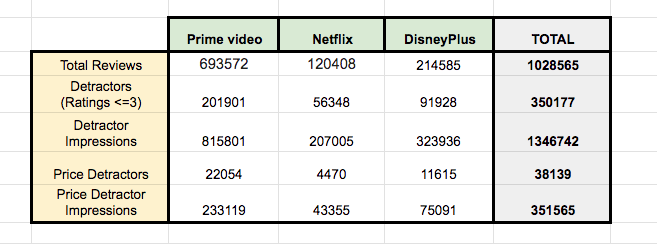


# **Findings:**


1.  **Price Detractor Percentage**
(Share of price detractor reviews in the overall detractor reviews):

    ***10.9%***
2.   **Price Detractor Impressions Percentage** (Share of price detractor impressions in the overall detractor impressions):

    **26.1%**





---



>  ✅ **1/10** th of the 'unhappy customers' are concerned about the pricing

>✅ Cost concerns accounts for more than **1/4** th of the overall concerns of the customers.





---






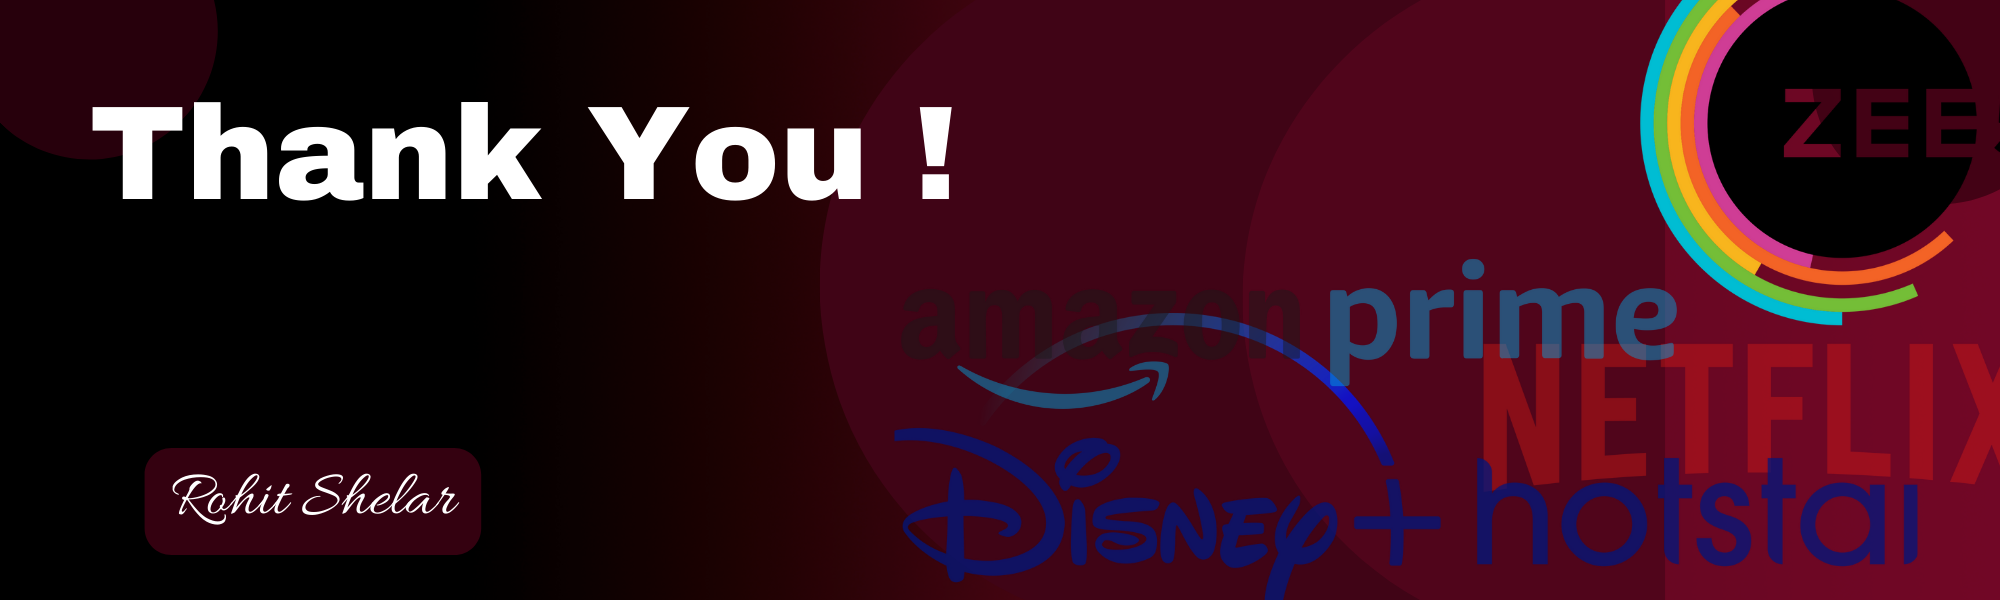